In [63]:
from pathlib import Path
import requests
import pickle
import gzip
import matplotlib.pyplot as plt
import math

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [4]:
# set path
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"
# download 
if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)
# open datasets
with gzip.open('data/mnist/mnist.pkl.gz', "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

0


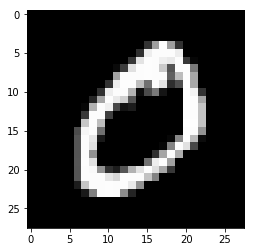

In [14]:
plt.imshow(x_train[1].reshape((28, 28)), cmap="gray")
print(y_train[1])

In [36]:
# convert to tensor
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape

bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]

/home/elbio/.virtualenvs/cursos/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
loss_func = F.cross_entropy

In [51]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

In [61]:
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=0.001)

In [64]:
model, opt = get_model()

In [70]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [ ]:
for epoch in range(5):
    model.train()
    for xb, yb in train_dl:
        import ipdb;ipdb.set_trace()
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

> <ipython-input-73-2ed7e16072e0>(5)<module>()
      4         import ipdb;ipdb.set_trace()
----> 5         pred = model(xb)
      6         loss = loss_func(pred, yb)



ipdb>  xb


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


ipdb>  xb.shape


torch.Size([64, 784])


ipdb>  n


> <ipython-input-73-2ed7e16072e0>(6)<module>()
      5         pred = model(xb)
----> 6         loss = loss_func(pred, yb)
      7 



ipdb>  pred


tensor([[ 2.2218e+00, -1.3036e+00,  7.3657e-01, -3.9584e-01, -8.7247e-01,
          4.6080e-01,  1.7612e-01,  2.2583e-01, -2.0577e-01, -4.6679e-01],
        [-3.7799e-01, -8.6325e-01,  2.6104e-01, -3.4748e-01, -3.8710e-01,
          1.2103e+00, -6.6818e-01, -1.3690e+00,  3.3121e+00,  3.7038e-02],
        [-1.1721e+00, -8.6678e-01, -7.7506e-01,  3.3797e+00, -7.2596e-01,
          9.4780e-01, -1.7496e+00, -1.3694e-01,  7.3621e-01,  3.7022e-01],
        [-4.3112e-01,  1.1725e+00,  8.3526e-01,  2.8282e-01, -9.6204e-01,
          2.0567e-01, -9.6152e-01, -7.0126e-01,  1.2491e+00, -2.6185e-01],
        [-4.1682e-01, -1.4055e+00,  4.2883e-01, -2.4452e-01, -4.3970e-03,
          7.6206e-02,  3.7383e+00, -2.1693e+00,  1.9534e-01, -2.4607e-03],
        [-1.0234e+00,  3.0629e+00,  9.4557e-01,  3.5161e-01, -1.3651e+00,
         -1.1833e-01, -5.7704e-01, -1.1376e+00,  1.1452e+00, -1.0109e+00],
        [-8.3163e-01, -6.5129e-01,  5.5845e-01, -7.1427e-01,  1.0269e+00,
         -5.0944e-01,  9.5527e-0

ipdb>  pred.shape


torch.Size([64, 10])


ipdb>  n


> <ipython-input-73-2ed7e16072e0>(8)<module>()
      7 
----> 8         loss.backward()
      9         opt.step()



ipdb>  loss


tensor(0.9500, grad_fn=<NllLossBackward>)


ipdb>  n


> <ipython-input-73-2ed7e16072e0>(9)<module>()
      8         loss.backward()
----> 9         opt.step()
     10         opt.zero_grad()



In [55]:
print(loss_func(model(xb), yb))

tensor(0.8974, grad_fn=<NllLossBackward>)
